This notebook aims at analyzing and predicting the efficiency of workout on the dataset "workout_fitness_tracker_data.csv"

In [5]:
#### import numpy as np # numerical computations
import pandas as pd # compact data structures

# the below lists all files under the input directory

import os
for dirname, subdirs, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    # for subdir in subdirs:
    #     print(os.path.join(dirname, subdir))


/kaggle/input/workout-and-fitness-tracker-data/workout_fitness_tracker_data.csv


In [13]:
# import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [14]:
# importing the data
fit_data = pd.read_csv('/kaggle/input/workout-and-fitness-tracker-data/workout_fitness_tracker_data.csv')
# pd.set_option('display.width', 1000)
fit_data

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,886,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued


In [15]:
fit_data.head() #get the first 5 rows

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [16]:
fit_data.tail() #get the last 5 rows

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,886,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued
9999,10000,47,Female,186,88,HIIT,56,978,126,8062,12.24,High,6.9,1.9,3056,84,38.4,28.5,Tired,Energized


In [17]:
fit_data.columns #retrieve the column names

Index(['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)', 'Mood Before Workout', 'Mood After Workout'], dtype='object')

In [18]:
fit_data.shape #retrieve the shape of dataset

(10000, 20)

In [19]:
fit_data.info() #info on null count, datatype & memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [20]:
fit_data.isnull().sum() #sum of the null rows

User ID                     0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Workout Type                0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
dtype: int64

In [21]:
fit_data.duplicated().sum() #sum of the duplicated rows

0

In [22]:
fit_data.drop(columns = ['User ID']).describe() #observe the central tendencies, quartiles of the dataset after dropping irrelevant column

,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.109529e-14,717.109026,11.566763,4.590336e-12,0.0
min,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [23]:
fit_data.columns # get the updated columns list

Index(['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)', 'Mood Before Workout', 'Mood After Workout'], dtype='object')

# EDA univariate analysis on numerical columns to help understand the pattern/outlier.
It is a stats technique performed on a single variable to observe the central tendency to identify the centre point of data distribution(mean,median,mode), dispersion to analyse the spread of data(variance,std deviation,range), frequency distribution(histograms, barplots), summary statistics(min,max,quartiles,percentile) and data visualization.

In [24]:
num_col = ['Age', 'Height (cm)', 'Weight (kg)',
           'Workout Duration (mins)', 'Calories Burned',
       'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)',
       'Sleep Hours', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)']
len(num_col)

11

# Distribution Of Data

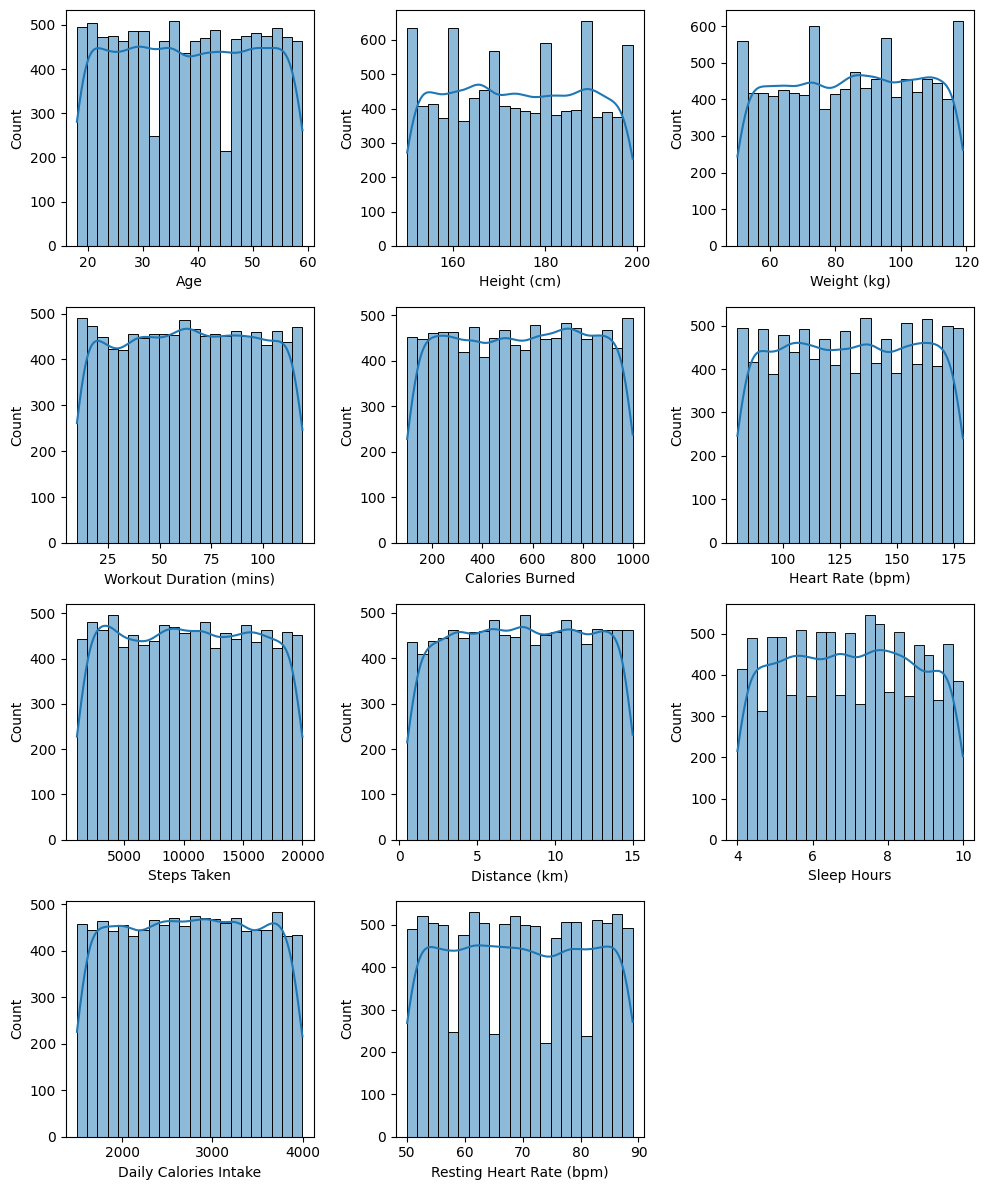

In [26]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (10,12))
for i, cols in enumerate(num_col):
    plt.subplot(4,3,i+1)
    sns.histplot(data = fit_data, x = cols, kde=True)
plt.tight_layout()
plt.show()
# plt.savefig("Fig-1")

# Box Plot - To identify outliers

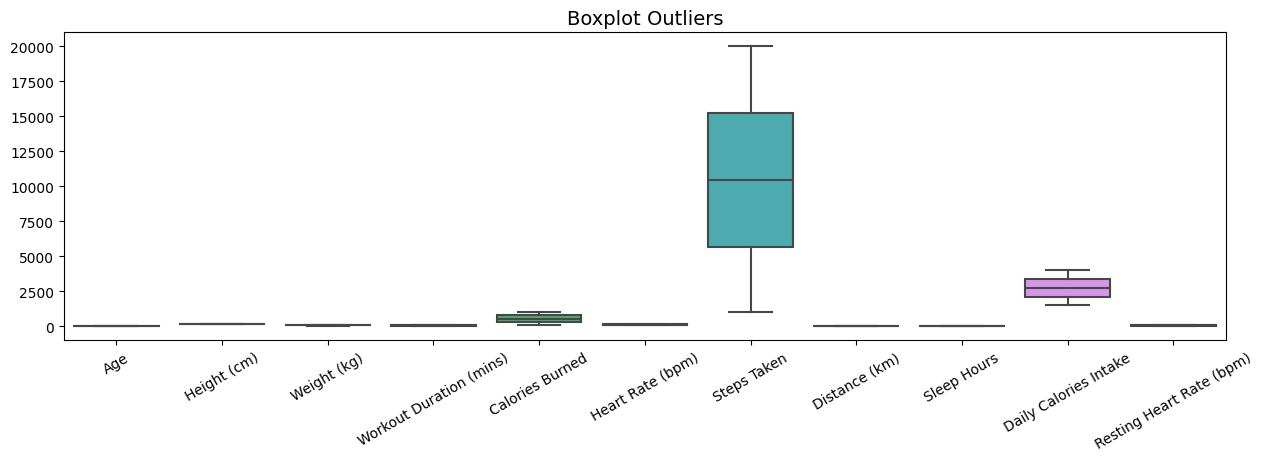

In [23]:
plt.figure(figsize=(15,4))
# sns.boxplot(data = fit_data[['Age', 'Height (cm)', 'Weight (kg)',
#                         'Calories Burned', 'Sleep Hours', 'VO2 Max']])
sns.boxplot(data = fit_data[['Age', 'Height (cm)', 'Weight (kg)',
           'Workout Duration (mins)', 'Calories Burned',
       'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)',
       'Sleep Hours', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)']])
plt.title("Boxplot Outliers", fontsize=14)
plt.xticks(rotation=30)
plt.show()

# SKEWNESS
skew() is a pandas method to calculate the skewness. skewness is a measure of the asymmetry of distrubution of data around the mean.
- value 0 represents perfect symmetrical distro
- +ve value represents right skewed
- -ve value represent left skewed


In [20]:
fit_data[num_col].skew()

Age                         0.006229
Height (cm)                 0.017389
Weight (kg)                -0.024774
Workout Duration (mins)    -0.008162
Calories Burned            -0.015803
Heart Rate (bpm)           -0.003818
Steps Taken                 0.006778
Distance (km)              -0.012480
Sleep Hours                 0.005073
Daily Calories Intake      -0.004375
Resting Heart Rate (bpm)    0.008110
dtype: float64

In [24]:
# univariate analysis on categorical columns
cat_col = ['Gender','Workout Type','Workout Intensity',
        'Mood Before Workout','Mood After Workout']
len(cat_col)

5

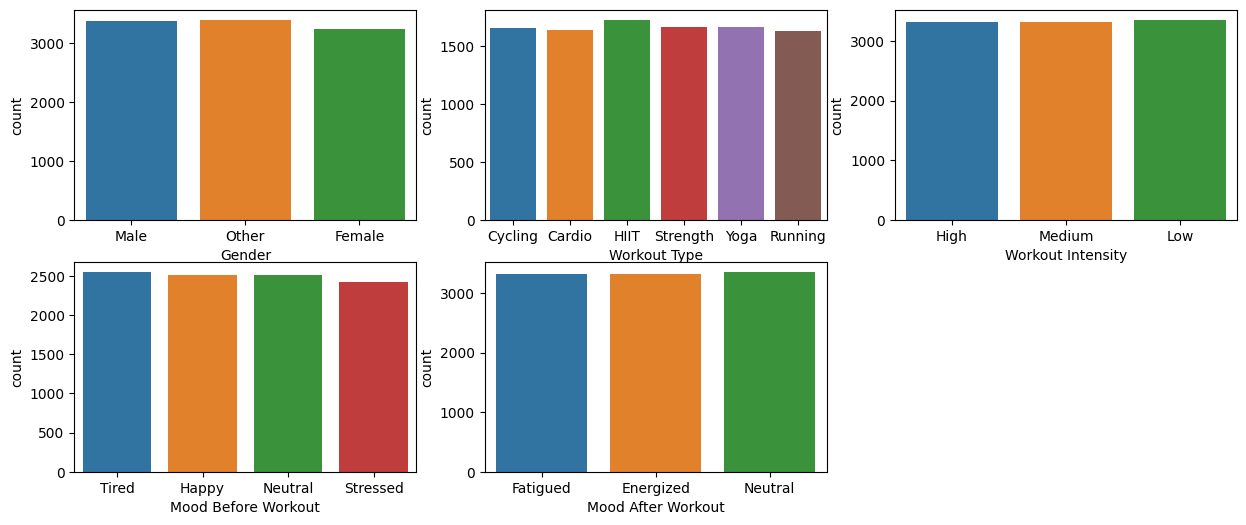

In [30]:
# distro of data
plt.figure(figsize = (15,6))
for i,cols in enumerate(cat_col):
    plt.subplot(2,3,1+i)
    sns.countplot(data = fit_data, x=cols)
plt.tight_layout
plt.show()

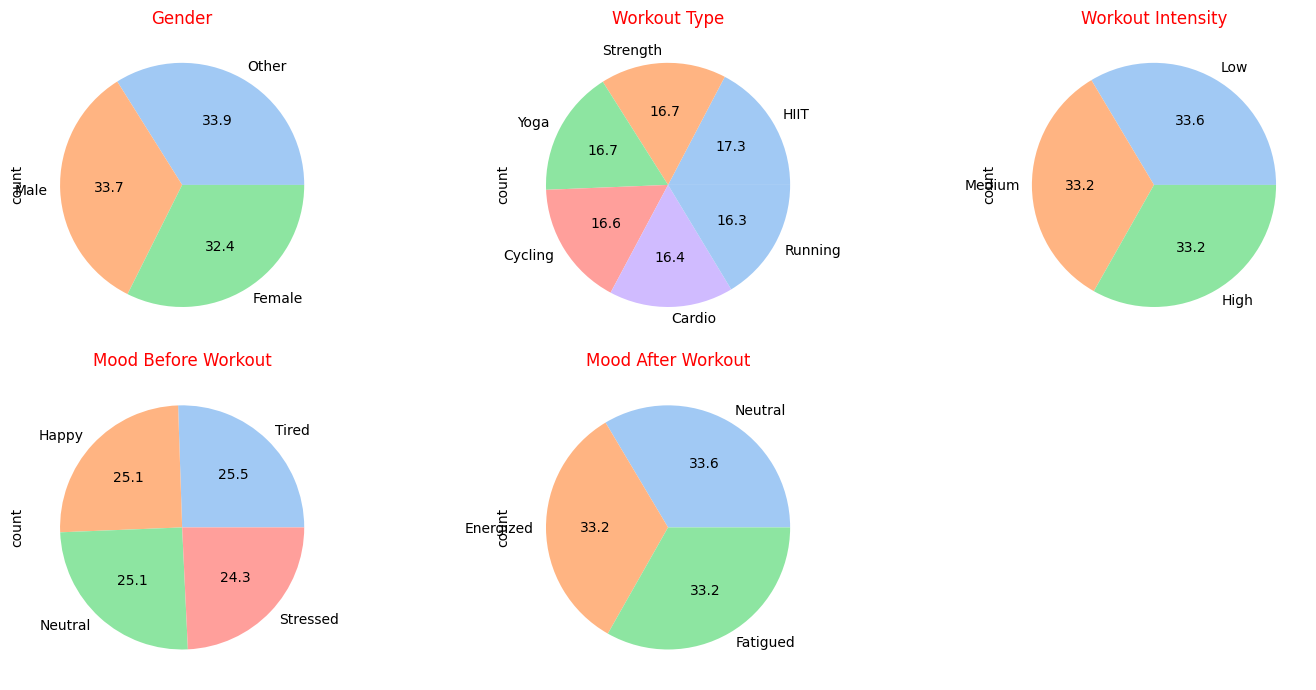

In [37]:
# percentage of categories
plt.figure(figsize = (15,7))
colors = sns.color_palette('pastel')[0:5]
for i,cols in enumerate(cat_col):
    plt.subplot(2,3,1+i)
    fit_data[cols].value_counts().plot(kind='pie',
                autopct="%0.1f", colors = colors)
    plt.title(cols, color="red")
plt.tight_layout()
plt.show()

# # Bivariate analysis & Multivariate analysis
- Bivariate: analysis of 2 variables to determine the empirical relationship between them.
      -- scatter plot (relationship b/w 2 c'n variables)
      -- contingency table (relationship b/w categorical variables)
       -- T and chi tests.

- Mutivariate: examinatin of 2+ variables to understand the relationship b/w them.
      -- Multiple Regression (models the relationship b/w one dep and multiple indep variables to observe how each predictor contributes to the outcome)
      -- PCA (reduces dimensionality while retaining key features)

In [38]:
# workout type vs heart rate
fit_data['Heart Rate (bpm)'].mean()

129.5267

<Axes: xlabel='Workout Type', ylabel='Heart Rate (bpm)'>

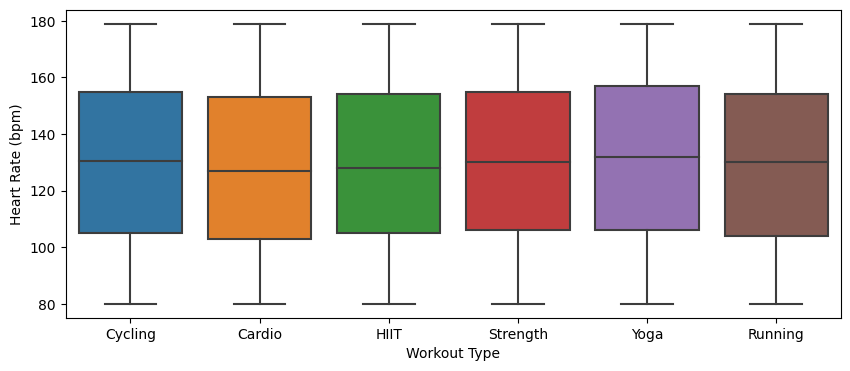

In [39]:
# detecting outliers for the above variables
plt.figure(figsize = (10,4))
sns.boxplot(data = fit_data, x = 'Workout Type', y = 'Heart Rate (bpm)')

In [40]:
# workout intensity vs height
fit_data['Height (cm)'].mean()

174.2751

<Axes: xlabel='Workout Intensity', ylabel='Height (cm)'>

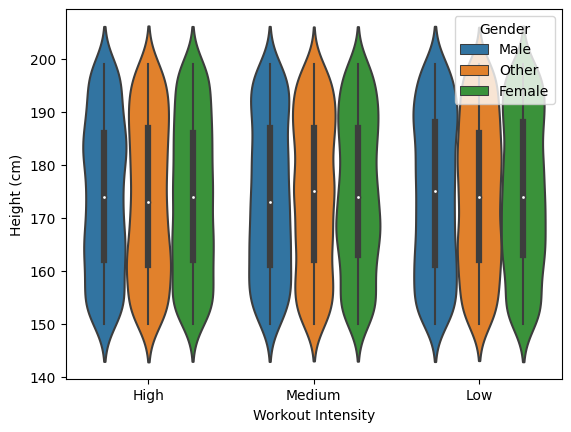

In [41]:
# using violin plot to combine the box plot and density plot, hue parameter is used to differentiate data within the same plot
sns.violinplot(data = fit_data, x = 'Workout Intensity', y = 'Height (cm)', hue = 'Gender')

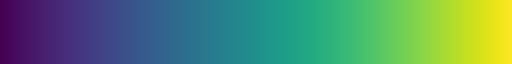

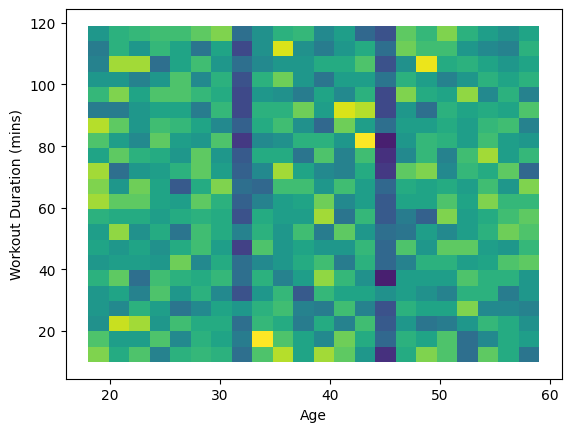

In [46]:
# age vs workout duration, cmap specifies the colormap for hisgtogram
sns.histplot(data = fit_data, x = 'Age', y='Workout Duration (mins)', cmap = "viridis")
sns.color_palette("viridis", as_cmap=True)

<Axes: xlabel='Workout Intensity', ylabel='Sleep Hours'>

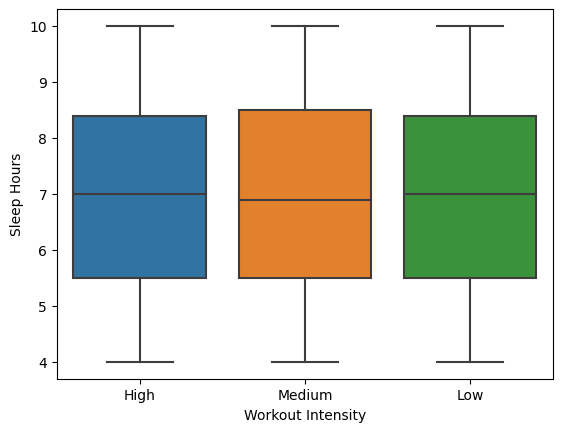

In [47]:
# sleep hours vs workout intensity
sns.boxplot(data = fit_data, x = 'Workout Intensity', y = 'Sleep Hours')

In [48]:
fit_data['heart_rate_diff'] = fit_data['Heart Rate (bpm)'] - fit_data['Resting Heart Rate (bpm)']
fit_data['heart_rate_diff']

0        51
1        95
2        53
3        53
4       111
       ... 
9995    104
9996     98
9997     41
9998     18
9999     42
Name: heart_rate_diff, Length: 10000, dtype: int64

<Axes: xlabel='Workout Type', ylabel='heart_rate_diff'>

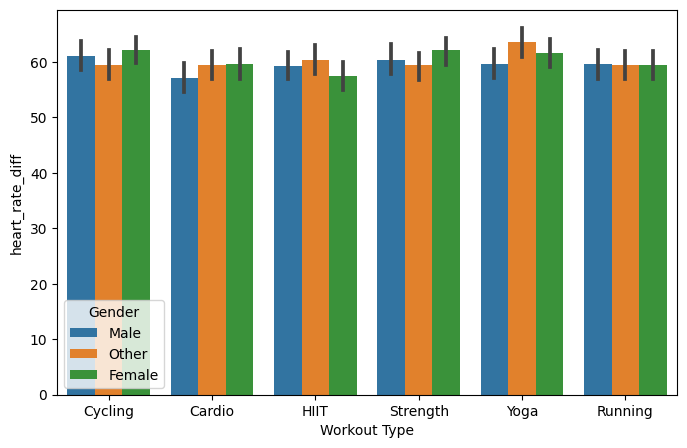

In [50]:
# heart rate difference during workouts
plt.figure(figsize = (8,5))
sns.barplot(data = fit_data, x = 'Workout Type', y = 'heart_rate_diff', hue = 'Gender')

<Axes: xlabel='Workout Duration (mins)', ylabel='Heart Rate (bpm)'>

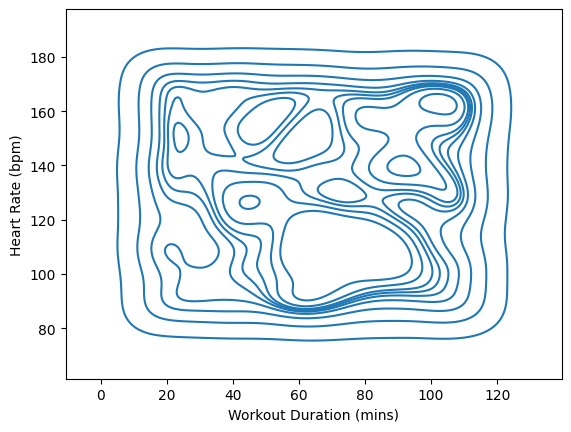

In [51]:
# kde = probability density function of continuous variable
sns.kdeplot(data = fit_data, x='Workout Duration (mins)', y='Heart Rate (bpm)')

# correlation matrix using matplotlib's imshow function.
- 1 indicates a perfect +ve linear relationship
- -ve 1 insicates a perfect -ve linear relationship
- 0 indicates no linear relationship

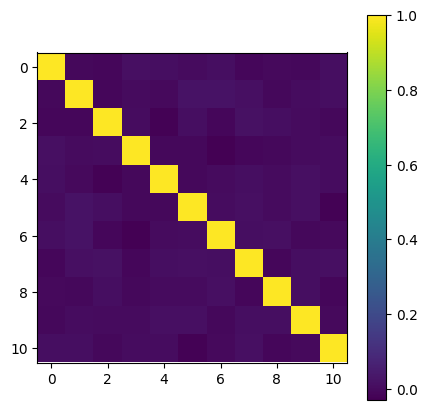

In [53]:
plt.figure(figsize=(5,5))
im_corr = fit_data[['Age','Height (cm)', 'Weight (kg)','Workout Duration (mins)', 
                    'Calories Burned','Heart Rate (bpm)', 'Steps Taken', 'Distance (km)',
                    'Sleep Hours', 'Daily Calories Intake','Resting Heart Rate (bpm)']]
corr_color = plt.imshow(im_corr.corr())
# plotting a bar chart
bar = plt.colorbar(corr_color)

# Training the model to check the `mood after workout` feature

In [54]:
# splitting the test and train dataset
x = fit_data.drop(columns = ['Mood After Workout', 'heart_rate_diff',
                            'VO2 Max', 'Body Fat (%)', 'User ID'])
y = fit_data['Mood After Workout']
x,y

(      Age  Gender  Height (cm)  Weight (kg) Workout Type  \
 0      39    Male          175           99      Cycling   
 1      36   Other          157          112       Cardio   
 2      25  Female          180           66         HIIT   
 3      56    Male          154           89      Cycling   
 4      53   Other          194           59     Strength   
 ...   ...     ...          ...          ...          ...   
 9995   20   Other          173           59         Yoga   
 9996   29  Female          171           71         HIIT   
 9997   47    Male          183           75      Running   
 9998   52    Male          170           97         HIIT   
 9999   47  Female          186           88         HIIT   
 
       Workout Duration (mins)  Calories Burned  Heart Rate (bpm)  Steps Taken  \
 0                          79              384               112         8850   
 1                          73              612               168         2821   
 2                  

In [55]:
fit_data.columns

Index(['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)',
       'Workout Type', 'Workout Duration (mins)', 'Calories Burned',
       'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity',
       'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)',
       'Mood Before Workout', 'Mood After Workout', 'heart_rate_diff'],
      dtype='object')

In [56]:
# train and test splitting
x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size = 0.3,random_state = 3)

# Column Transformers
- The `ColumnTransformer` allows to apply different preprocessing steps to specific columns within the dataset.
- `StandardScaler` to the specified numerical columns, which scales the data so that each feature has a mean of 0 and a standard deviation of 1.
- `OneHotEncoder` to the specified categorical columns, which converts them into binary (0 or 1) columns. The drop='first' parameter removes one of the encoded columns to avoid multicollinearity.
- `OrdinalEncoder` to the 'Workout Intensity' column, which converts ordinal categories into integers based on the specified order.

In [57]:
# pre-processing - encoding and normalization
col_transf = ColumnTransformer(
    [
        ('normalize', StandardScaler(), ['Age','Height (cm)','Weight (kg)',
                                        'Workout Duration (mins)', 'Calories Burned',
                                        'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)',
                                        'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake',
                                        'Resting Heart Rate (bpm)']),
        ('encoding', OneHotEncoder(drop="first"),['Gender','Workout Type', 'Mood Before Workout']),
        ('ordinal', OrdinalEncoder(categories = [['High', 'Medium',
                                                 'Low']]), ['Workout Intensity'])      
    ]
)
col_transf

In [58]:
col_transf

ColumnTransformer(transformers=[('normalize', StandardScaler(),
                                 ['Age', 'Height (cm)', 'Weight (kg)',
                                  'Workout Duration (mins)', 'Calories Burned',
                                  'Heart Rate (bpm)', 'Steps Taken',
                                  'Distance (km)', 'Sleep Hours',
                                  'Water Intake (liters)',
                                  'Daily Calories Intake',
                                  'Resting Heart Rate (bpm)']),
                                ('encoding', OneHotEncoder(drop='first'),
                                 ['Gender', 'Workout Type',
                                  'Mood Before Workout']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['High', 'Medium',
                                                             'Low']]),
                                 ['Workout Intensity'])])

# The `LabelEncoder` is used to encode target labels with values between 0 and n_classes-1

In [59]:
lab_encoder = LabelEncoder()
y_train_new = lab_encoder.fit_transform(y_train)
y_test_new = lab_encoder.fit_transform(y_test)
y_train_new, y_test_new

(array([2, 2, 2, ..., 1, 2, 2]), array([1, 1, 0, ..., 2, 2, 2]))

# The below line fits the `ColumnTransformer` to the training feature data (xtrain) and transforms it based on the specified preprocessing steps

In [60]:
x_train_new = col_transf.fit_transform(x_train)
x_test_new = col_transf.fit_transform(x_test)
x_train_new, x_test_new

(array([[-0.85286497, -0.92687869,  0.34286535, ...,  1.        ,
          0.        ,  1.        ],
        [ 0.38469147, -0.58102475, -0.7983416 , ...,  1.        ,
          0.        ,  0.        ],
        [-1.10037626,  0.04151236, -0.99681237, ...,  0.        ,
          1.        ,  1.        ],
        ...,
        [ 0.38469147,  0.87156183,  0.64057151, ...,  0.        ,
          0.        ,  2.        ],
        [ 0.05467642, -0.78853712, -0.10369389, ...,  0.        ,
          1.        ,  1.        ],
        [ 0.21968395, -0.44268317,  0.24362996, ...,  1.        ,
          0.        ,  2.        ]]),
 array([[-1.50675758, -1.24914872,  0.76655989, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.12099638, -1.31860761, -0.9607044 , ...,  0.        ,
          0.        ,  1.        ],
        [ 1.58597494, -0.4851009 , -0.17109787, ...,  1.        ,
          0.        ,  2.        ],
        ...,
        [ 1.42319954, -0.83239537, -0.51655072, ...,  

In [61]:
# printing shapes of train and test data
print(x_train_new.shape)
print(x_test_new.shape)
print(y_train_new.shape)
print(y_test_new.shape)

(7000, 23)
(3000, 23)
(7000,)
(3000,)


In [62]:
# model training
Models = {
    'Logistic Regression' : LogisticRegression(multi_class = "multinomial"),
    'KNN' : KNeighborsClassifier(n_neighbors=3),
    'SVC' : SVC(kernel = "rbf"),
    'Decision Tree' : DecisionTreeClassifier(max_depth = 3),
    'xgboost' : XGBClassifier()
}

In [72]:
# accuracy results
accuracy_result = {}
for model_name, model in Models.items():
    model.fit(x_train_new, y_train_new)
    y_pred = model.predict(x_test_new)
    accuracy_score = sklearn.metrics.accuracy_score(y_test_new, y_pred)
    accuracy_result[model_name] = accuracy_score
    print('{0} Accuracy : {1:0.2f}'.format(model_name, accuracy_score))

Logistic Regression Accuracy : 0.34
KNN Accuracy : 0.33
SVC Accuracy : 0.34
Decision Tree Accuracy : 0.32
xgboost Accuracy : 0.32


# Individual model evaluation

In [68]:
# logistic regression
lr=LogisticRegression()
lr.fit(x_train_new, y_train_new)
ly_pred = lr.predict(x_test_new)
y_test_new, ly_pred
score=accuracy_score(y_test_new,ly_pred)
score

0.3406666666666667

In [69]:
# KNN
knn = KNeighborsClassifier()
knn.fit(x_train_new, y_train_new)
knn_pred = knn.predict(x_test_new)
score_2 = accuracy_score(y_test_new,knn_pred)
score_2

0.3293333333333333

In [70]:
# SVC
svc = SVC()
svc.fit(x_train_new, y_train_new)
sv_pred=svc.predict(x_test_new)
import sklearn.metrics
score_3 = sklearn.metrics.accuracy_score(y_test_new, sv_pred)
score_3

0.33866666666666667

In [71]:
# decision tree
tree = DecisionTreeClassifier()
tree.fit(x_train_new,y_train_new)
tr_pred=tree.predict(x_test_new)
score_4 = sklearn.metrics.accuracy_score(y_test_new, tr_pred)
print(f"{score_4:0.2f}")

0.33


# EXAMPLE OF SKEWED DATA


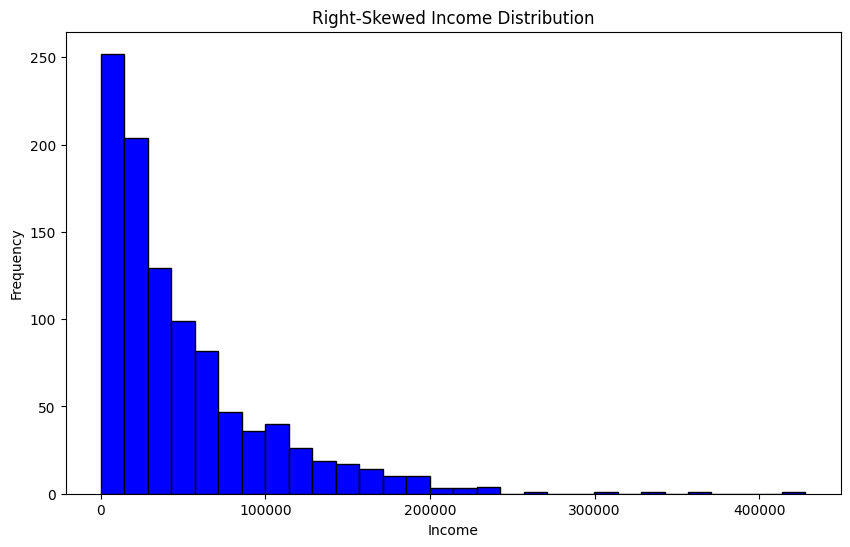

In [64]:

import matplotlib.pyplot as plt
import numpy as np

# Generate sample data for a right-skewed distribution
np.random.seed(0)
income_data = np.random.exponential(scale=50000, size=1000)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(income_data, bins=30, color='blue', edgecolor='black')
plt.title('Right-Skewed Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()
